In [1]:
import nltk

In [2]:
#within shell hit l, gives you list of packages
#can hit enter to see more of list
#we want stopwords
#enter d
#enter stopwords
#enter q to stop schell

nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> l

Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [ ] book_grammars....... Grammars from NLTK Book
  [ ] brown............... Brown Corpus
  [ ] brown_tei........... Brown Corpus (TEI XML Version)
  [ ] cess_cat............ CESS-CAT Treebank
  [ ] cess_esp............ CESS-ESP Treebank
  [ ] chat80.....

In [4]:
#uci data set: SMS Spam Collection Data Set Spam vs. Ham
#spam detection filter
#read data in
messages = [line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]

In [5]:
#check out length
print(len(messages))

5574


In [8]:
messages[0]

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [10]:
#collection of text = corpus
#print out first 10 messages and number them using enumeerate
for mess_no, message in enumerate(messages[:10]):
    print(mess_no, message)
    print('\n')

(0, 'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')


(1, 'ham\tOk lar... Joking wif u oni...')


(2, "spam\tFree entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's")


(3, 'ham\tU dun say so early hor... U c already then say...')


(4, "ham\tNah I don't think he goes to usf, he lives around here though")


(5, "spam\tFreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, \xc2\xa31.50 to rcv")


(6, 'ham\tEven my brother is not like to speak with me. They treat me like aids patent.')


(7, "ham\tAs per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune")


(8, 'spam\tWINNER!! As a valued network customer you have been selected to receive

In [11]:
messages[0]

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [12]:
#\t idicates this is a tab separation
import pandas as pd

In [14]:
#set up data frame with tab separator and labels
messages = pd.read_csv('smsspamcollection/SMSSpamCollection', sep='\t',
                      names=['label','message'])

In [16]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [18]:
#less unique message than message count

In [20]:
#grouby describe method, separate hame and spam
messages.groupby('label').describe()

message
label                                                          
ham   count                                                4825
      unique                                               4516
      top                                Sorry, I'll call later
      freq                                                   30
spam  count                                                 747
      unique                                                653
      top     Please call our customer service representativ...
      freq                                                    4

In [21]:
#shows popularity of ham and spam messages

In [22]:
#more feature engineering

In [23]:
#how long are text messages, add as new column
messages['length'] = messages['message'].apply(len)

In [25]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

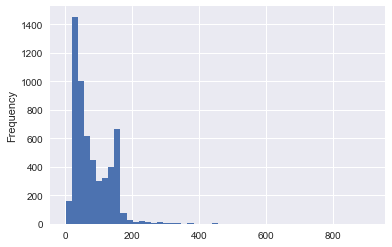

In [28]:
messages['length'].plot.hist(bins=50)

In [ ]:
#two peakes, text length might be a good feature?

In [35]:
#long message?
messages['length'].describe()

count    5572.000000
mean       80.616296
std        60.015593
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [36]:
#find long message
messages[messages['length']==910]

,label,message,length
1085,ham,For me the love should start with attraction.i...,910


In [37]:
#grap message column
messages[messages['length']==910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<matplotlib.axes._subplots.AxesSubplot object at 0x110f01e10>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1110591d0>], dtype=object)

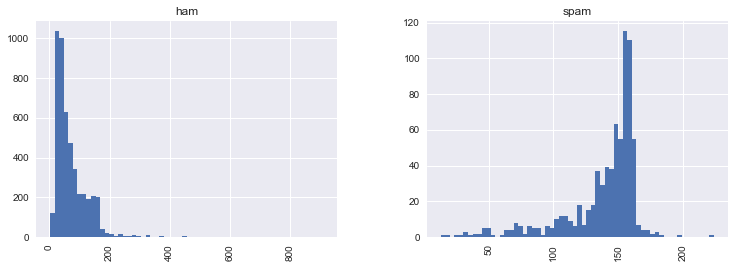

In [39]:
#message length distiqushing feature?
messages.hist(column='length', by='label', bins=60, figsize=(12,4))

In [40]:
#spam messages tend to have more characters ~150
#ham ~50

In [41]:
#text pre-processing, need numerical vector
#string to vector: bag of words
#function that split messeage into indiv words return a list
#remove common words: the, a (stop words)
#string library

In [42]:
import string

In [43]:
mess = 'Sample message! Notice: it has punctuation.'

In [44]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [45]:
#can use list comprehension
nopunc = [i for i in mess if i not in string.punctuation]

In [46]:
nopunc

['S',
 'a',
 'm',
 'p',
 'l',
 'e',
 ' ',
 'm',
 'e',
 's',
 's',
 'a',
 'g',
 'e',
 ' ',
 'N',
 'o',
 't',
 'i',
 'c',
 'e',
 ' ',
 'i',
 't',
 ' ',
 'h',
 'a',
 's',
 ' ',
 'p',
 'u',
 'n',
 'c',
 't',
 'u',
 'a',
 't',
 'i',
 'o',
 'n']

In [47]:
#it has removed all punctuation

In [48]:
#remove stop words

In [49]:
from nltk.corpus import stopwords

In [50]:
#common words
stopwords.words('english')

[u'i',
 u'me',
 u'my',
 u'myself',
 u'we',
 u'our',
 u'ours',
 u'ourselves',
 u'you',
 u'your',
 u'yours',
 u'yourself',
 u'yourselves',
 u'he',
 u'him',
 u'his',
 u'himself',
 u'she',
 u'her',
 u'hers',
 u'herself',
 u'it',
 u'its',
 u'itself',
 u'they',
 u'them',
 u'their',
 u'theirs',
 u'themselves',
 u'what',
 u'which',
 u'who',
 u'whom',
 u'this',
 u'that',
 u'these',
 u'those',
 u'am',
 u'is',
 u'are',
 u'was',
 u'were',
 u'be',
 u'been',
 u'being',
 u'have',
 u'has',
 u'had',
 u'having',
 u'do',
 u'does',
 u'did',
 u'doing',
 u'a',
 u'an',
 u'the',
 u'and',
 u'but',
 u'if',
 u'or',
 u'because',
 u'as',
 u'until',
 u'while',
 u'of',
 u'at',
 u'by',
 u'for',
 u'with',
 u'about',
 u'against',
 u'between',
 u'into',
 u'through',
 u'during',
 u'before',
 u'after',
 u'above',
 u'below',
 u'to',
 u'from',
 u'up',
 u'down',
 u'in',
 u'out',
 u'on',
 u'off',
 u'over',
 u'under',
 u'again',
 u'further',
 u'then',
 u'once',
 u'here',
 u'there',
 u'when',
 u'where',
 u'why',
 u'how',
 u'all

In [51]:
nopunc

['S',
 'a',
 'm',
 'p',
 'l',
 'e',
 ' ',
 'm',
 'e',
 's',
 's',
 'a',
 'g',
 'e',
 ' ',
 'N',
 'o',
 't',
 'i',
 'c',
 'e',
 ' ',
 'i',
 't',
 ' ',
 'h',
 'a',
 's',
 ' ',
 'p',
 'u',
 'n',
 'c',
 't',
 'u',
 'a',
 't',
 'i',
 'o',
 'n']

In [55]:
#using .join (example)
x = ['a','b','c','d']

In [56]:
'+++'.join(x)

'a+++b+++c+++d'

In [57]:
#use this on our list
nopunc = ''.join(nopunc)

In [58]:
nopunc

'Sample message Notice it has punctuation'

In [59]:
#make into a list again
nopunc.split()

['Sample', 'message', 'Notice', 'it', 'has', 'punctuation']

In [60]:
clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [61]:
clean_mess

['Sample', 'message', 'Notice', 'punctuation']

In [68]:
def text_process(mess):
    """
    1. remove punc
    2. remove stop words
    3. return list of clean text words
    """
    
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [63]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [71]:
#tokenize messages (normal text string to tokens)
#creates list
messages['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [72]:
#running ran run
#steming breaks all down and returns run
#need a dictionary for htis, nltk has a dictionary



In [76]:
#convert each message into a vector that machine learing models can understand
"""
Steps
1. Count how many times a word occurs in each message(frequency)
2. weigh the counts, so that fequent tokens get lower weight (inverse doc frequency)
3. Normalize the vectors to the unit length to abstract from the orignal length(L2 norm)
"""

'\nSteps\n1. Count how many times a word occurs in each message(frequency)\n2. weigh the counts, so that fequent tokens get lower weight (inverse doc frequency)\n3. Normalize the vectors to the unit length to abstract from the orignal length(L2 norm)\n'

In [78]:
#use sklearn CountVectorizer, model converts collection of text doc to matrix of token counts
#row per word, columns = messages
#gives you a sparse matrix (matrix with a lot  of zero values), way to store and save on memory
from sklearn.feature_extraction.text import CountVectorizer

In [79]:
#specifed analyser to be previously defined function (text_process)
#fit to text data
bow_transformer = CountVectorizer(analyzer=text_process).fit(messages['message'])

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:10: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal


In [81]:
print(len(bow_transformer.vocabulary_))

11425


In [82]:
#grabbing 4th message
mess4 = messages['message'][3]

In [83]:
print(mess4)

U dun say so early hor... U c already then say...


In [84]:
#capture only mess4
bow4 = bow_transformer.transform([mess4])

In [85]:
print(bow4)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [86]:
#7 unique words in mess 4, two of them appear twice
#grab first word
bow_transformer.get_feature_names()[4068]

'U'

In [87]:
#check out sparse matrix
messages_bow = bow_transformer.transform(messages['message'])

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:10: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal


In [88]:
print('Shape of Sparse Matrix:', messages_bow.shape)

('Shape of Sparse Matrix:', (5572, 11425))


In [89]:
#rows, #columns

In [90]:
#check amount of non-zero occurances
messages_bow.nnz

50548

In [92]:
sparsity = (100.0 * messages_bow.nnz/ (messages_bow.shape[0] * messages_bow.shape[1]))
print('sparsity: {}'.format(sparsity))

sparsity: 0.0794029541267


In [93]:
#number of non-zero messages vs total messages
#sklearn TF-IDF
from sklearn.feature_extraction.text import TfidfTransformer

In [94]:
#fit it to bag of words
tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [96]:
#transform 4th message we did earlier
tfidf4 = tfidf_transformer.transform(bow4)

In [97]:
print(tfidf4)

  (0, 9554)	0.538562626293
  (0, 7186)	0.438936565338
  (0, 6222)	0.318721689295
  (0, 6204)	0.299537997237
  (0, 5261)	0.297299574059
  (0, 4629)	0.266198019061
  (0, 4068)	0.408325899334


In [98]:
#inverse doc freq and term freq relationship

In [101]:
#inverse doc freq of certain word
tfidf_transformer.idf_[bow_transformer.vocabulary_['university']]

8.527076498901426

In [102]:
#entier bag of words to tfidf
messages_tfidf = tfidf_transformer.transform(messages_bow)

In [103]:
#train spam ham classifier
#niave base classifer
from sklearn.naive_bayes import MultinomialNB

In [104]:
spam_detect_model = MultinomialNB().fit(messages_tfidf,messages['label'])

In [105]:
spam_detect_model.predict(tfidf4)

array(['ham'], 
      dtype='|S4')

In [106]:
#grab first part of array
spam_detect_model.predict(tfidf4)[0]

'ham'

In [107]:
messages['label'][3]

'ham'

In [109]:
#run on all messages
all_pred = spam_detect_model.predict(messages_tfidf)
all_pred

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], 
      dtype='|S4')

In [110]:
#we trained everthing on our training data

In [111]:
from sklearn.cross_validation import train_test_split

In [113]:
msg_train, msg_test, label_train, label_test = train_test_split(messages['message'], messages['label'], test_size=0.3)

In [116]:
#sklearn has data pipline feature
#summarizes all steps we just did into a pipline
from sklearn.pipeline import Pipeline

In [119]:
#takes in atuple that takes in:
#the name of the step 'bow'
#CountVectorizer (strings to token intergerizer step)
#transformer: for integer count with weighted tfidf scores
#classifier: train this on our model
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    #can replace with RandomForestClassifier
    ('classifier', MultinomialNB())
])

In [120]:
#directly pass in training data and will do above steps for us
pipeline.fit(msg_train,label_train)

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:10: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal


Pipeline(steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x1112e9140>, binary=False,
        decode_error=u'strict', dtype=<type 'numpy.int64'>,
        encoding=u'utf-8', input=u'content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=Non...         use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [121]:
predictions = pipeline.predict(msg_test)

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:10: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal


In [122]:
from sklearn.metrics import classification_report
print(classification_report(label_test, predictions))

             precision    recall  f1-score   support

        ham       0.96      1.00      0.98      1428
       spam       1.00      0.73      0.85       244

avg / total       0.96      0.96      0.96      1672



In [ ]:
#have about a 96% accuracy